матералы: 
* https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
* https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series

## Набор данных Содержит три файла
* Подтвержденные случаи
* Случаи смерти
* Восстановленные случаи

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
%matplotlib inline 

In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,43,43,47,48,50,50,50,53,59
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,274,293,331,360,420,461,502,511,581,639
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,108,110,110,117,130,138,150,150,160,178
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,29,36,50,50,83,93,99,117,129,149


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,6,6,6,10,10,15
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cols = confirmed_df.keys()

## Хранение значений только дат

In [7]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

## Общее количество случаев выздоровления

In [8]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

## Изменение формы данных

In [9]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# EDA

In [10]:
confirmed.isna().sum()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
1/27/20    0
1/28/20    0
1/29/20    0
1/30/20    0
1/31/20    0
2/1/20     0
2/2/20     0
2/3/20     0
2/4/20     0
2/5/20     0
2/6/20     0
2/7/20     0
2/8/20     0
2/9/20     0
2/10/20    0
2/11/20    0
2/12/20    0
2/13/20    0
2/14/20    0
2/15/20    0
2/16/20    0
2/17/20    0
2/18/20    0
2/19/20    0
2/20/20    0
2/21/20    0
2/22/20    0
2/23/20    0
2/24/20    0
2/25/20    0
2/26/20    0
2/27/20    0
2/28/20    0
2/29/20    0
3/1/20     0
3/2/20     0
3/3/20     0
3/4/20     0
3/5/20     0
3/6/20     0
3/7/20     0
3/8/20     0
3/9/20     0
3/10/20    0
3/11/20    0
dtype: int64

In [11]:
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

In [12]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

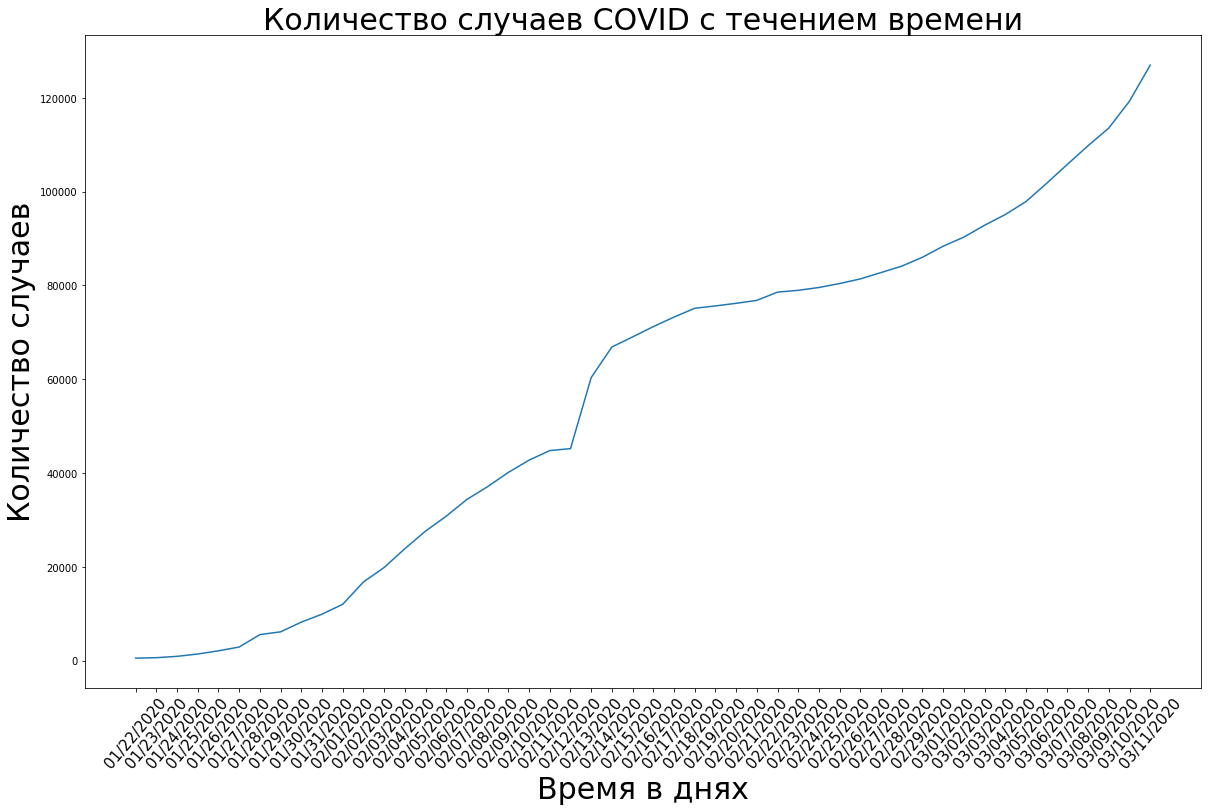

In [13]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Количество случаев COVID с течением времени', size=30)
plt.xlabel('Время в днях', size=30)
plt.ylabel('Количество случаев', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

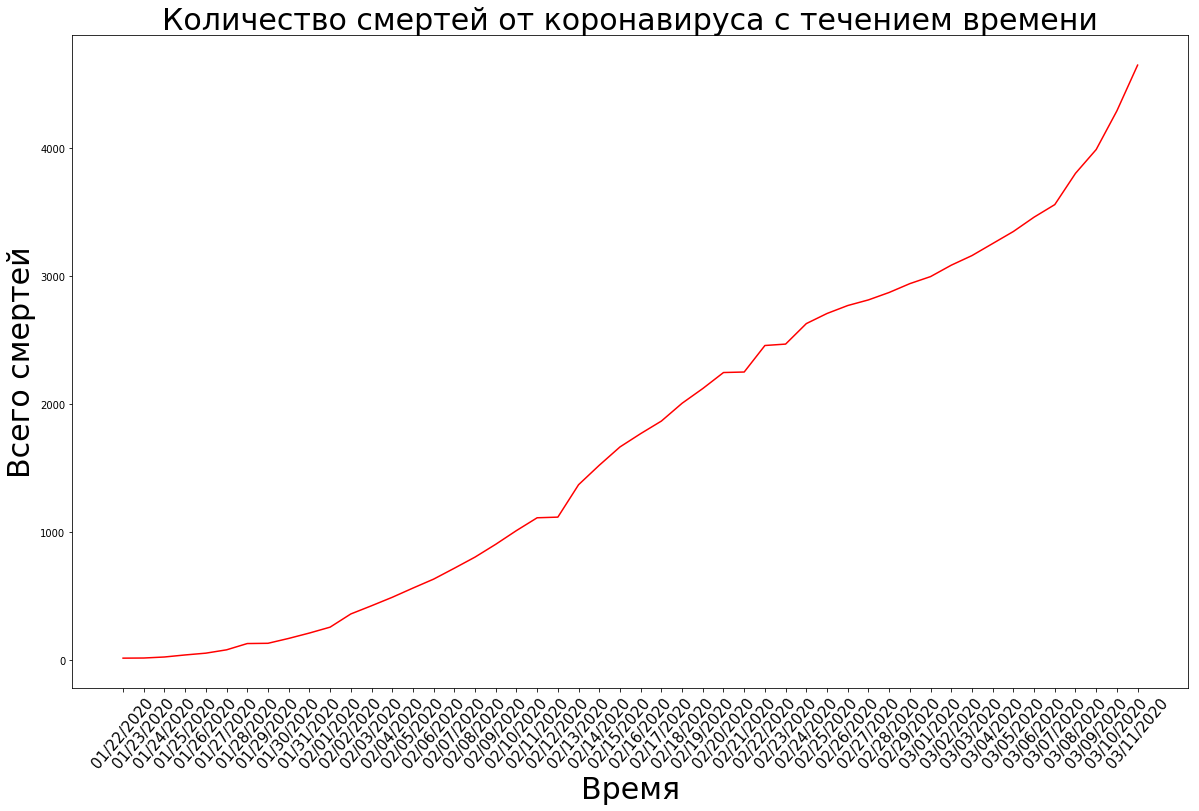

In [14]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Количество смертей от коронавируса с течением времени', size=30)
plt.xlabel('Время', size=30)
plt.ylabel('Всего смертей', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

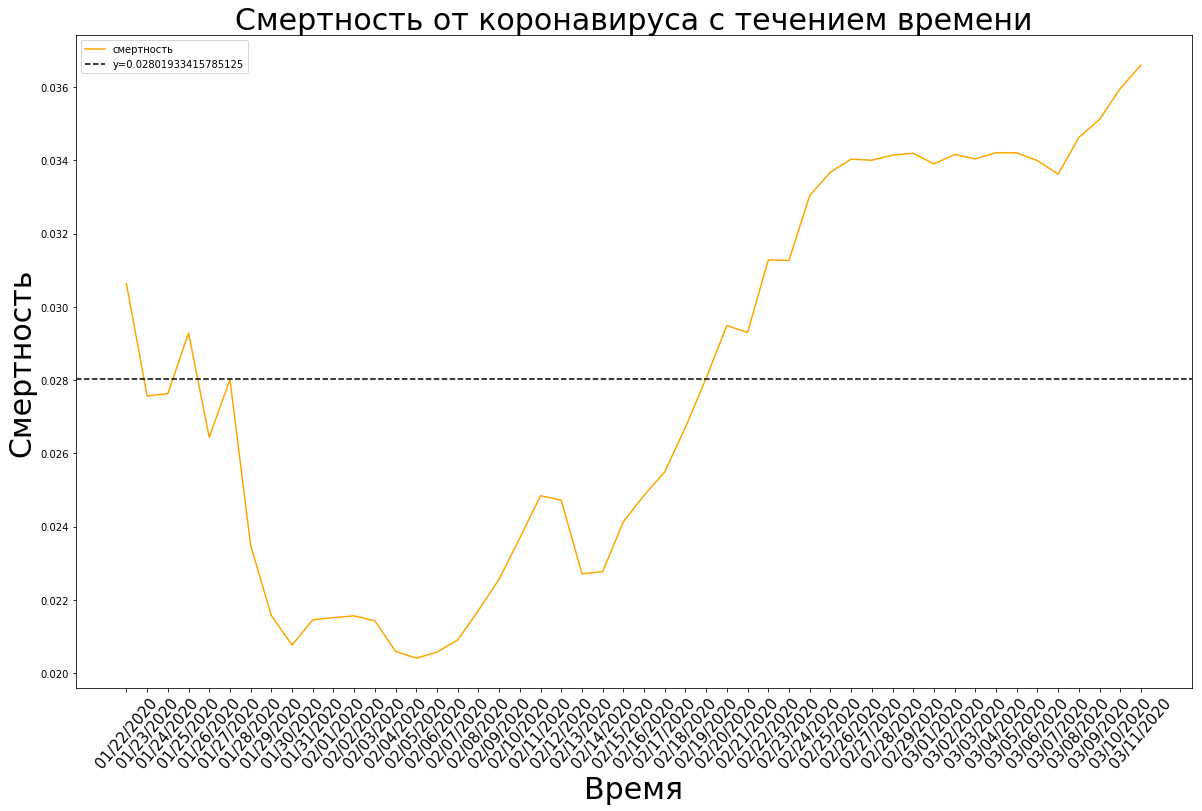

In [15]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Смертность от коронавируса с течением времени', size=30)
plt.legend(['смертность', 'y='+str(mean_mortality_rate)])
plt.xlabel('Время', size=30)
plt.ylabel('Смертность', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

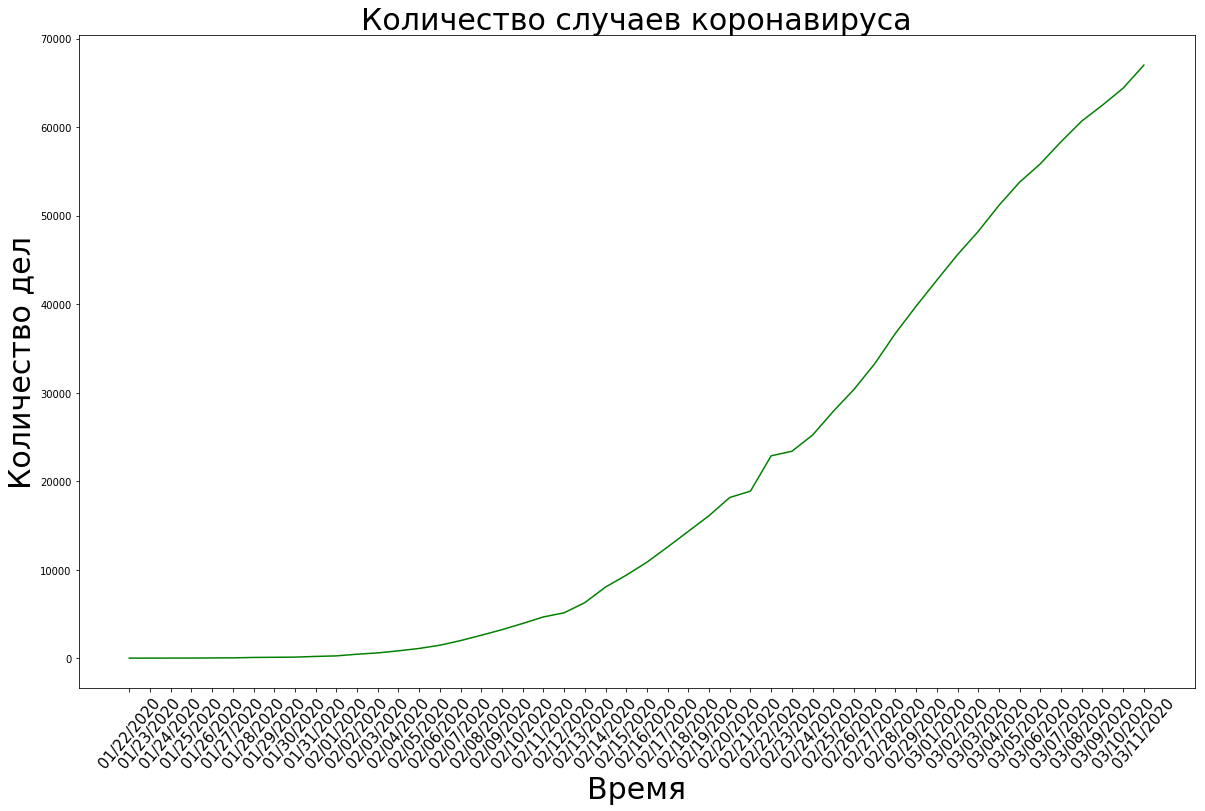

In [16]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Количество случаев коронавируса', size=30)
plt.xlabel('Время', size=30)
plt.ylabel('Количество дел', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

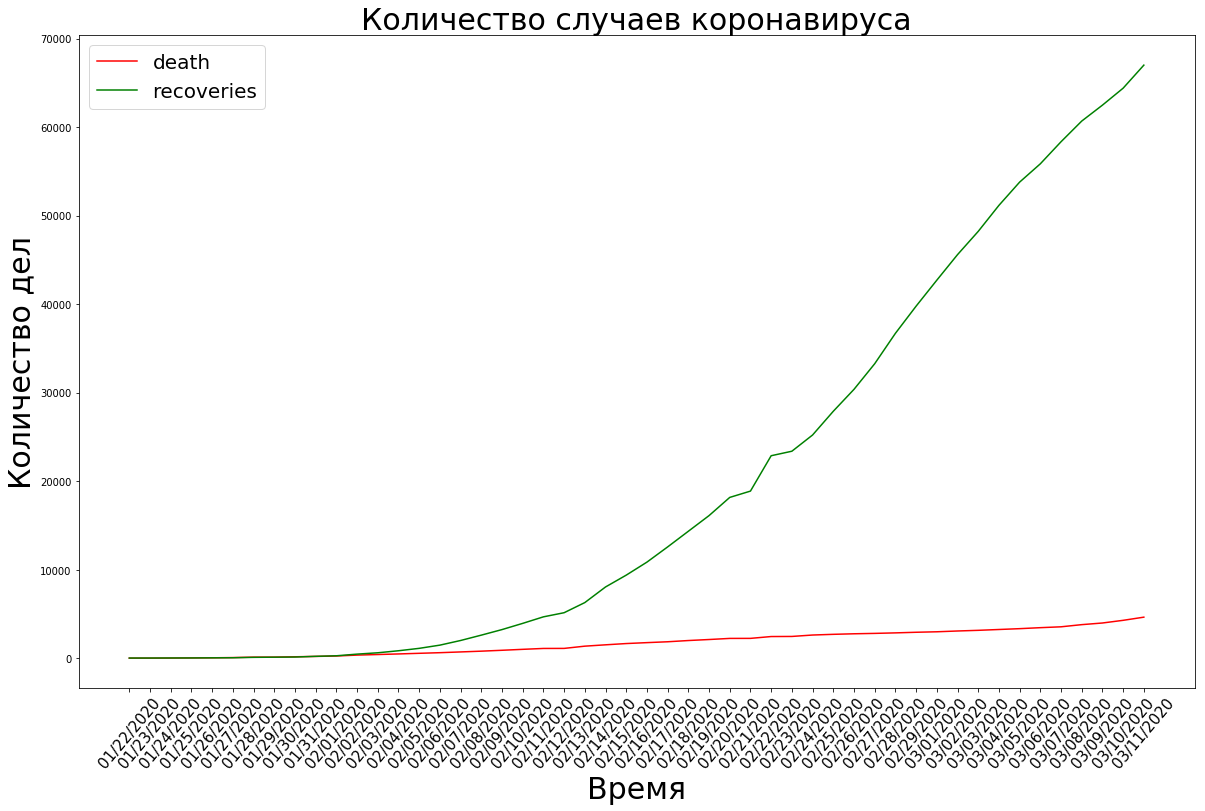

In [17]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Количество случаев коронавируса', size=30)
plt.xlabel('Время', size=30)
plt.ylabel('Количество дел', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

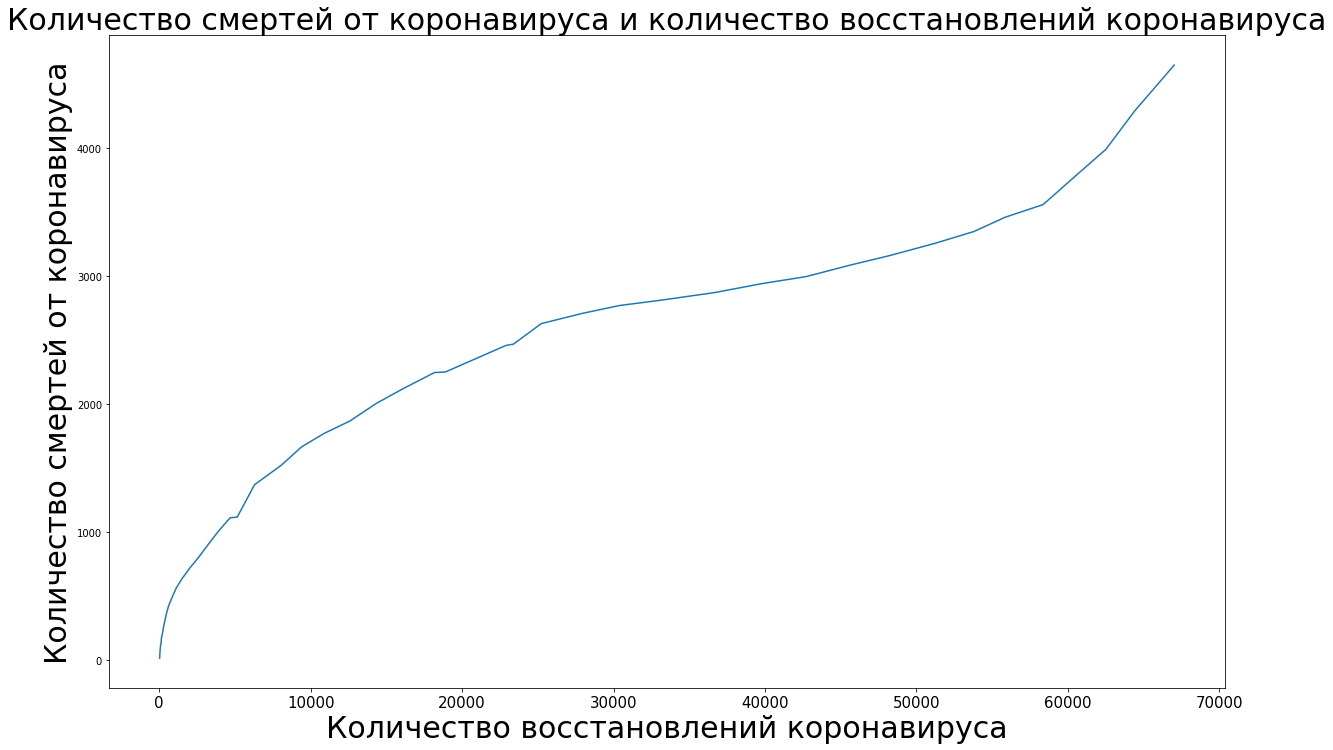

In [18]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Количество смертей от коронавируса и количество восстановлений коронавируса', size=30)
plt.xlabel('Количество восстановлений коронавируса', size=30)
plt.ylabel('Количество смертей от коронавируса', size=30)
plt.xticks(size=15)
plt.show()

In [19]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]

In [20]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [21]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)

In [22]:
# number of cases per country/region
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Thailand: 59 cases
Japan: 639 cases
Singapore: 178 cases
Nepal: 1 cases
Malaysia: 149 cases
Canada: 108 cases
Australia: 128 cases
Cambodia: 3 cases
Sri Lanka: 2 cases
Germany: 1908 cases
Finland: 59 cases
United Arab Emirates: 74 cases
Philippines: 49 cases
India: 62 cases
Italy: 12462 cases
Sweden: 500 cases
Spain: 2277 cases
Belgium: 314 cases
Egypt: 60 cases
Lebanon: 61 cases
Iraq: 71 cases
Oman: 18 cases
Afghanistan: 7 cases
Bahrain: 195 cases
Kuwait: 72 cases
Algeria: 20 cases
Croatia: 19 cases
Switzerland: 652 cases
Austria: 246 cases
Israel: 109 cases
Pakistan: 19 cases
Brazil: 38 cases
Georgia: 24 cases
Greece: 99 cases
North Macedonia: 7 cases
Norway: 598 cases
Romania: 45 cases
Estonia: 16 cases
Netherlands: 503 cases
San Marino: 62 cases
Belarus: 9 cases
Iceland: 85 cases
Lithuania: 3 cases
Mexico: 8 cases
New Zealand: 5 cases
Nigeria: 2 cases
Ireland: 43 cases
Luxembourg: 7 cases
Monaco: 1 cases
Qatar: 262 cases
Ecuador: 17 cases
Azerbaijan: 11 cases
Armenia: 1 cases
Domin

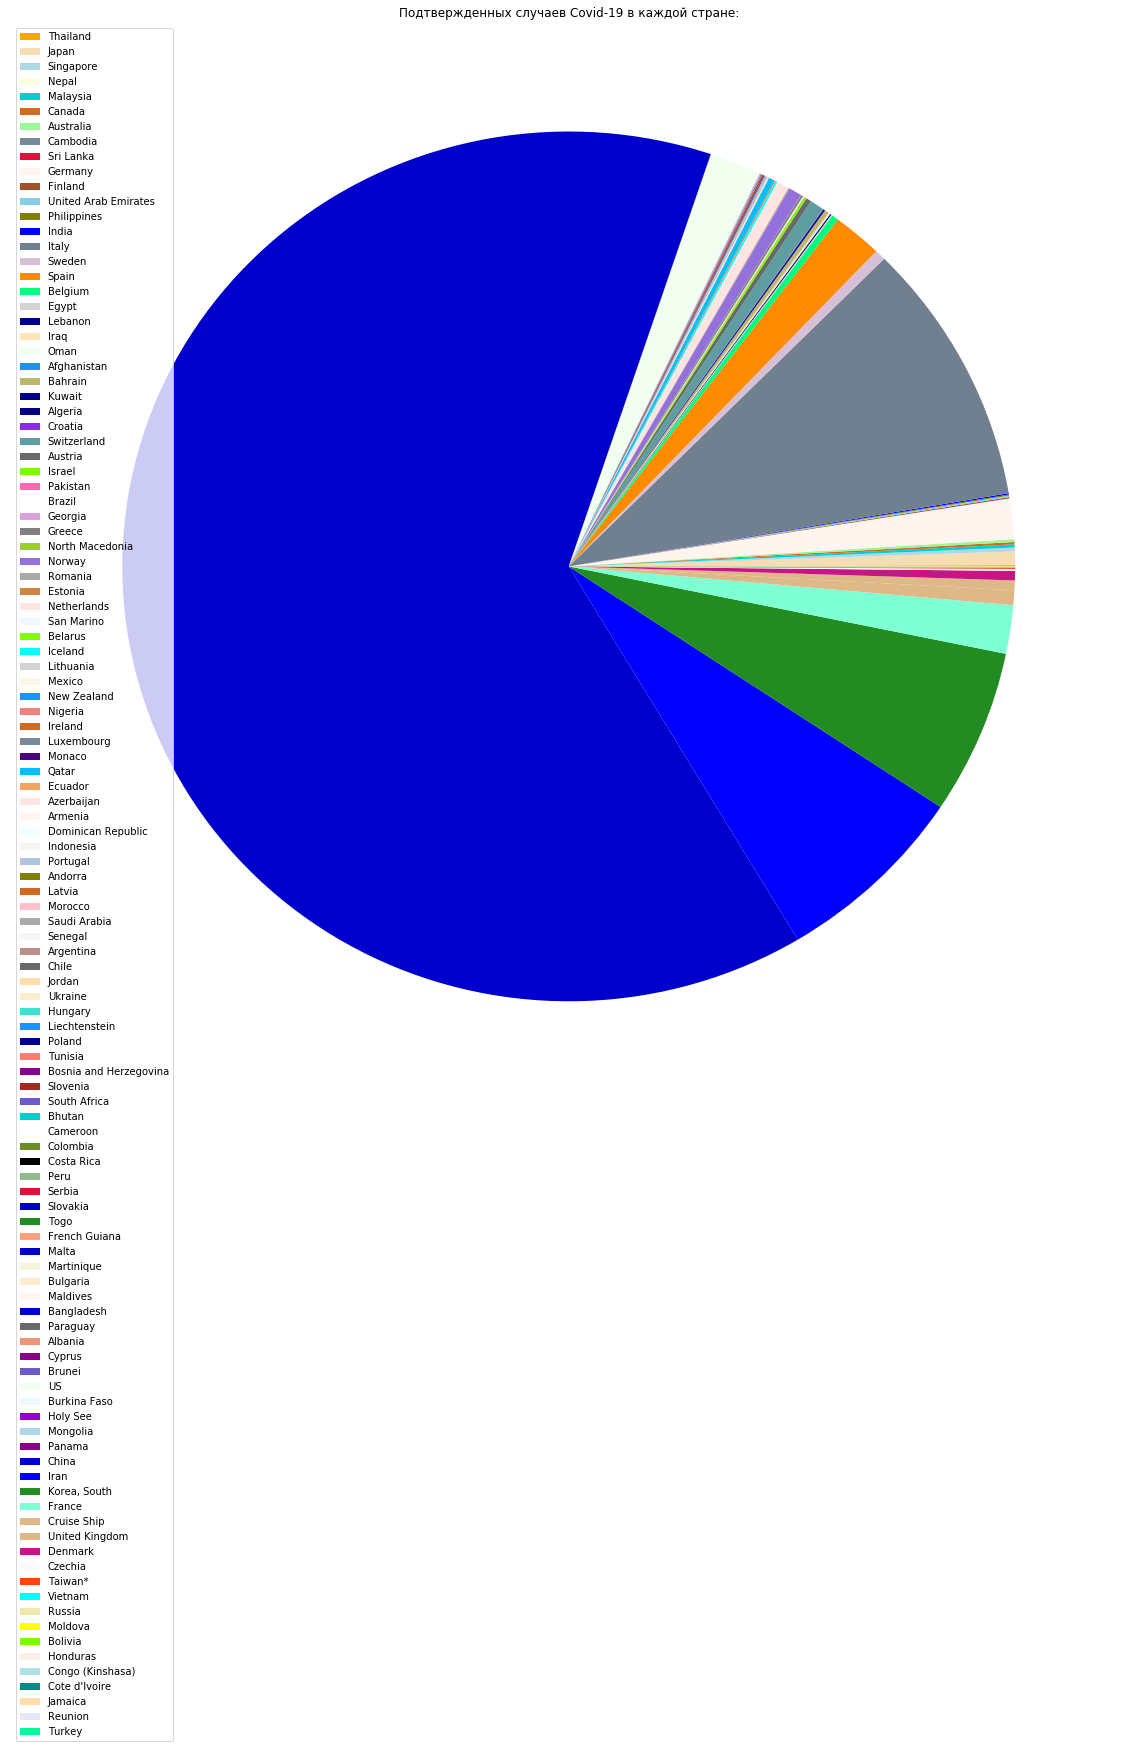

In [24]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Подтвержденных случаев Covid-19 в каждой стране:')
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()

# Прогнозы

## Обучение и тестирование

## Разделение набора данных

In [25]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=False) 

In [26]:
X_train_confirmed.shape, y_train_confirmed.shape, X_test_confirmed.shape, y_test_confirmed.shape

((45, 1), (45, 1), (5, 1), (5, 1))

# SVM для регрессии

### Настройка гиперпараметра с использованием randomsearch cv

In [27]:
import numpy as np
from sklearn.svm import SVR

kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.1s finished
c:\users\alisher\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=-1,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1], 'shrinking': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [28]:
svm_search.best_params_

{'shrinking': True,
 'kernel': 'linear',
 'gamma': 0.01,
 'epsilon': 0.01,
 'C': 10}

In [29]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)

# Модель линейной регрессии

In [30]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 4159.732345931203
MSE: 32473776.84062878


In [32]:
linear_model.coef_

array([[2365.53336738]])

# Random Forest Regression (Случайный лес)

In [33]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 7, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],}

# Создание модели RandomizedSearchCV
rfr_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=30,
                              cv=5,
                              verbose=True)

# Пригонка RandomizedSearchCV 
rfr_model.fit(X_train_confirmed, y_train_confirmed)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-package

c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vec

c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vec

c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vec

c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vec

c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alisher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vec

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=None,
          param_distributions={'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]), 'max_depth': [None, 3, 7, 10], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'max_features': [0.5, 1, 'sqrt', 'auto']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [34]:
test_rfr_pred = rfr_model.predict(X_test_confirmed)
rfr_pred = rfr_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_rfr_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_rfr_pred, y_test_confirmed))

MAE: 22597.049761904746
MSE: 565643330.9819994


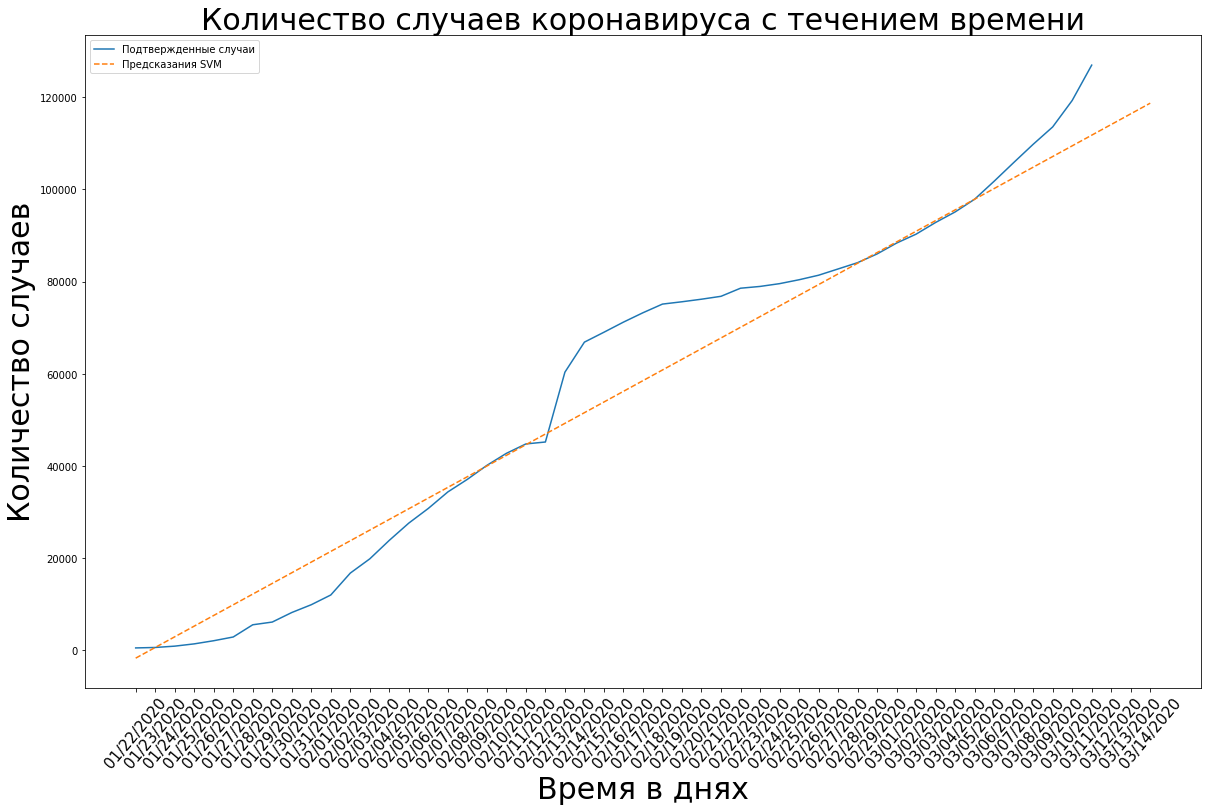

In [35]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, svm_pred, linestyle='dashed')
plt.title('Количество случаев коронавируса с течением времени', size=30)
plt.xlabel('Время в днях', size=30)
plt.ylabel('Количество случаев', size=30)
plt.legend(['Подтвержденные случаи', 'Предсказания SVM'])
plt.xticks(rotation=50, size=15)
plt.show()

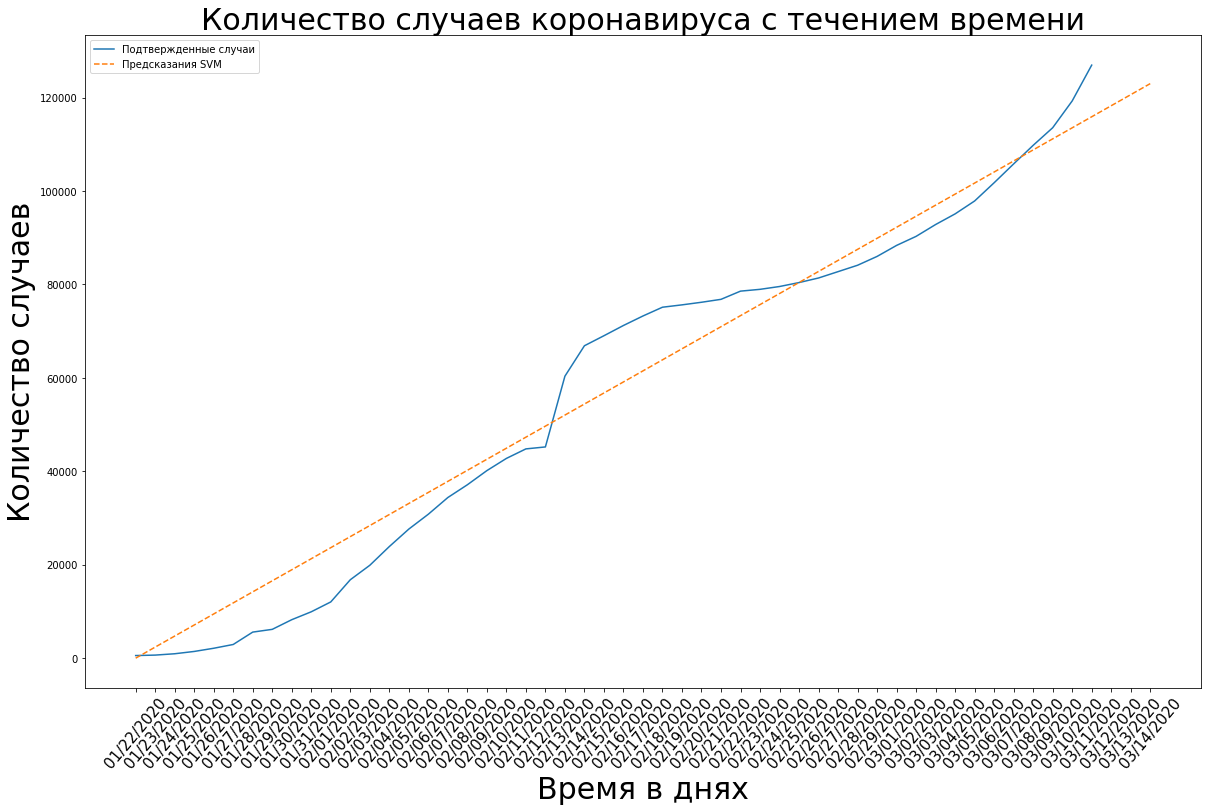

In [36]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, linear_pred, linestyle='dashed')
plt.title('Количество случаев коронавируса с течением времени', size=30)
plt.xlabel('Время в днях', size=30)
plt.ylabel('Количество случаев', size=30)
plt.legend(['Подтвержденные случаи', 'Предсказания SVM'])
plt.xticks(rotation=50, size=15)
plt.show()

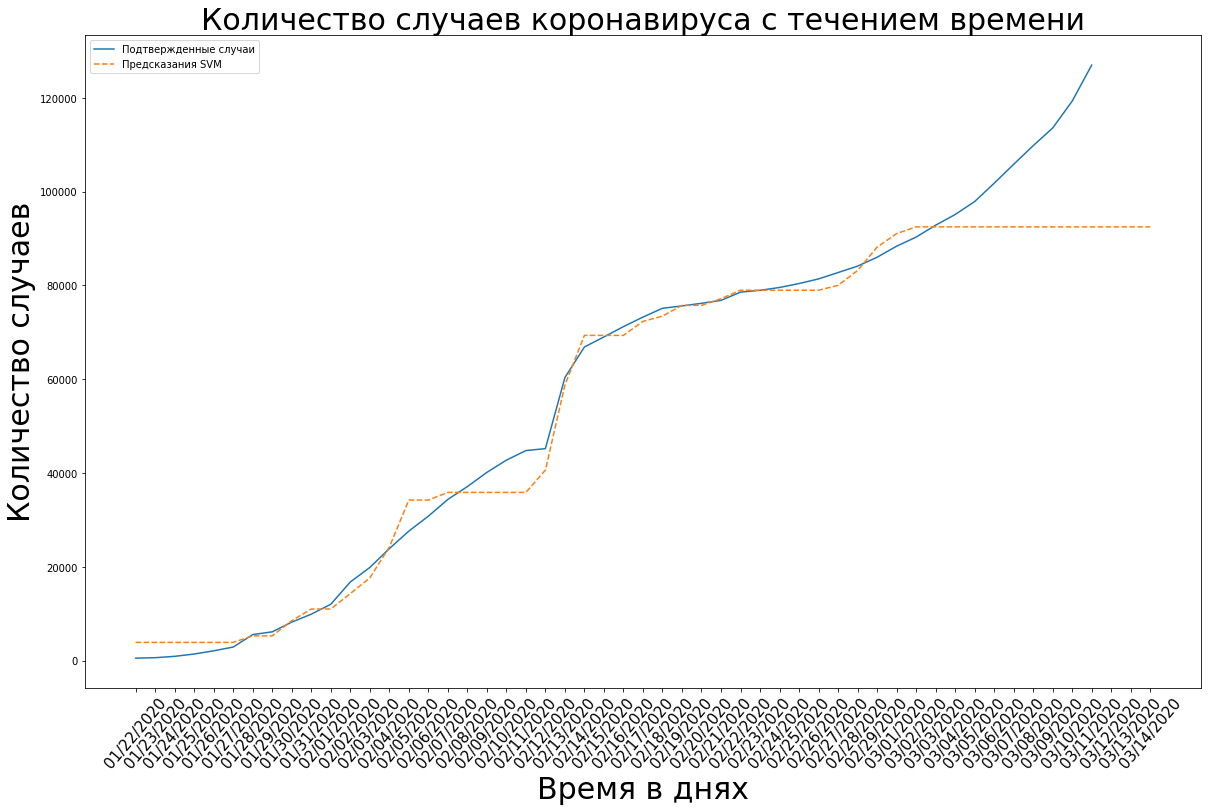

In [37]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, rfr_pred, linestyle='dashed')
plt.title('Количество случаев коронавируса с течением времени', size=30)
plt.xlabel('Время в днях', size=30)
plt.ylabel('Количество случаев', size=30)
plt.legend(['Подтвержденные случаи', 'Предсказания SVM'])
plt.xticks(rotation=50, size=15)
plt.show()

In [38]:
print('SVM prediction: ', set(zip(future_forcast_dates[-4], svm_pred[-4:])))

SVM prediction:  {('0', 111771.84714285714), ('3', 114086.82333333335), ('/', 116401.79952380953), ('1', 118716.77571428572)}


In [39]:
print('Random Forest Regessor prediction: ', set(zip(future_forcast_dates[-4:], rfr_pred[-4:])))

Random Forest Regessor prediction:  {('03/11/2020', 92491.55023809525), ('03/12/2020', 92491.55023809525), ('03/13/2020', 92491.55023809525), ('03/14/2020', 92491.55023809525)}
